In [ ]:
import pandas as pd           # For handling DataFrames and data manipulation
import matplotlib.pyplot as plt  # For creating various types of graphs
import seaborn as sns         # For advanced visualization such as heatmaps

In [ ]:
from google.colab import files

df = pd.read_csv("/content/NYC-recycling-diversion-and-capture-rates.csv")

In [ ]:
df.head()


,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total,Capture Rate-Paper,Capture Rate-MGP,Capture Rate-Total
0,Brooklyn North,BKN01,10,2019,April,14.687093,44.909160,43.034062,44.146764
1,Brooklyn North,BKN02,10,2019,April,19.950181,34.194020,57.947031,41.213700
2,Brooklyn North,BKN03,10,2019,April,12.164161,33.521557,44.919731,38.155937
3,Brooklyn North,BKN04,10,2019,April,15.541803,35.211361,68.511260,48.750755
4,Brooklyn North,BKN05,10,2019,April,10.051845,22.265430,45.051791,31.530129


In [ ]:
df.isnull()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total,Capture Rate-Paper,Capture Rate-MGP,Capture Rate-Total
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2827,False,False,False,False,False,False,False,False,False
2828,False,False,False,False,False,False,False,False,False
2829,False,False,False,False,False,False,False,False,False
2830,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['Zone', 'District', 'Fiscal Month Number', 'Fiscal Year', 'Month Name',
       'Diversion Rate-Total ', 'Capture Rate-Paper ', 'Capture Rate-MGP',
       'Capture Rate-Total'],
      dtype='object')

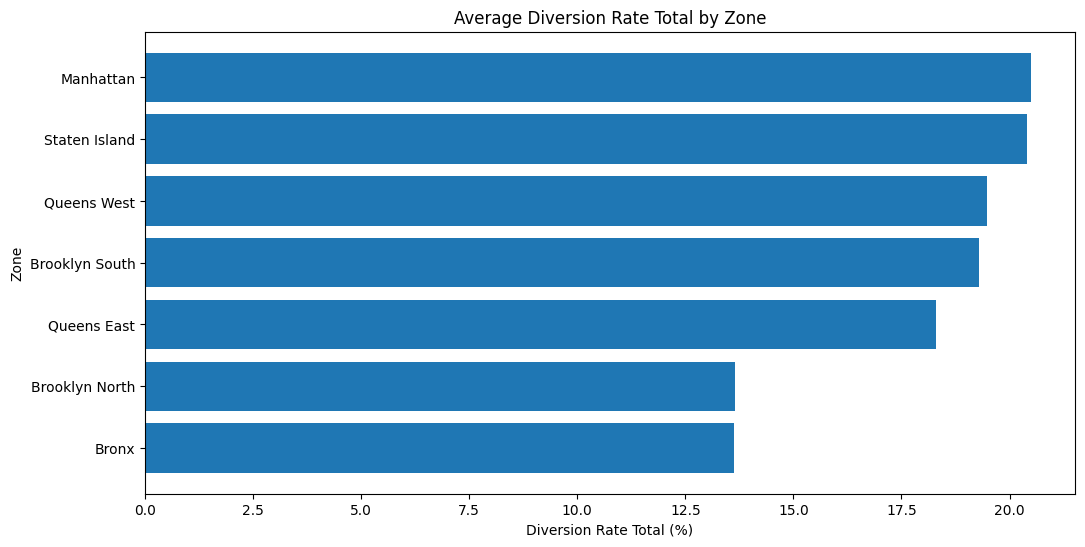

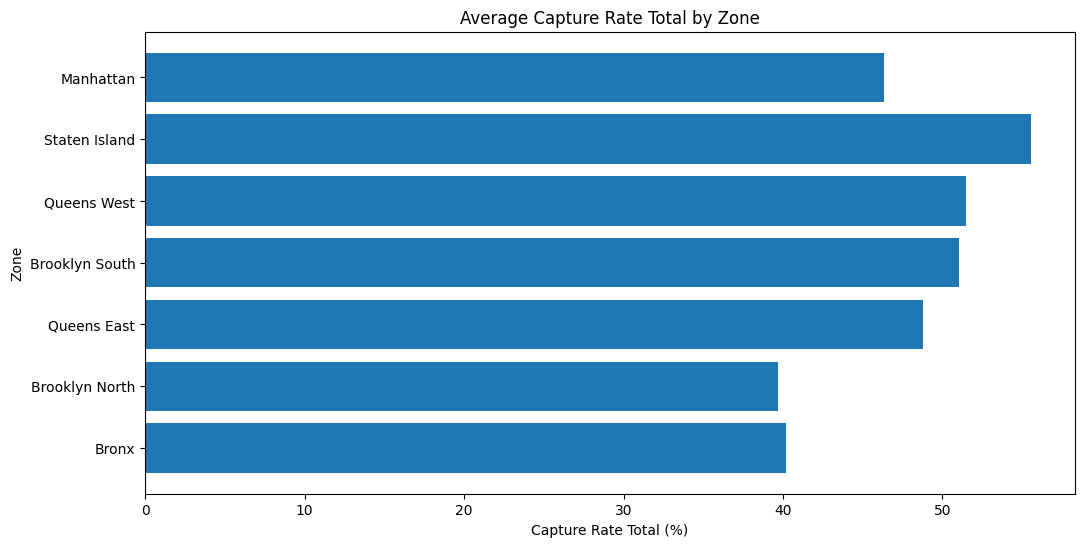

,Diversion Rate-Total,Capture Rate-Total
Zone,,
Bronx,13.614674,40.198558
Brooklyn North,13.658001,39.659000
Queens East,18.309736,48.768839
Brooklyn South,19.300317,51.058554
Queens West,19.468078,51.505599
Staten Island,20.410823,55.533794
Manhattan,20.489944,46.331025


In [ ]:
# Grouping by zone to analyze average performance
zone_avg = df.groupby("Zone")[["Diversion Rate-Total", "Capture Rate-Total"]].mean().sort_values(by="Diversion Rate-Total")

# Chart: Diversion Rate-Total by Zone
plt.figure(figsize=(12,6))
plt.barh(zone_avg.index, zone_avg["Diversion Rate-Total"])
plt.xlabel("Diversion Rate Total (%)")
plt.ylabel("Zone")
plt.title("Average Diversion Rate Total by Zone")
plt.show()

# Chart: Capture Rate-Total by Zone
plt.figure(figsize=(12,6))
plt.barh(zone_avg.index, zone_avg["Capture Rate-Total"])
plt.xlabel("Capture Rate Total (%)")
plt.ylabel("Zone")
plt.title("Average Capture Rate Total by Zone")
plt.show()

# Showing table
display(zone_avg)


In [ ]:
df.columns

Index(['Zone', 'District', 'Fiscal Month Number', 'Fiscal Year', 'Month Name',
       'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP',
       'Capture Rate-Total'],
      dtype='object')

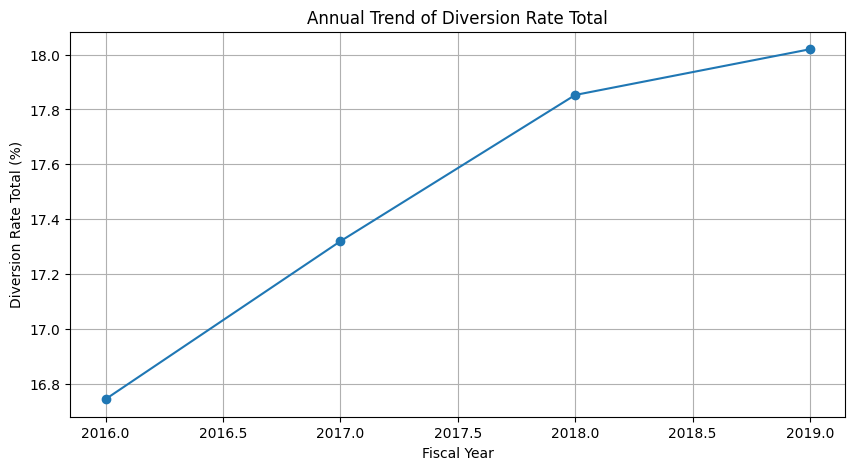

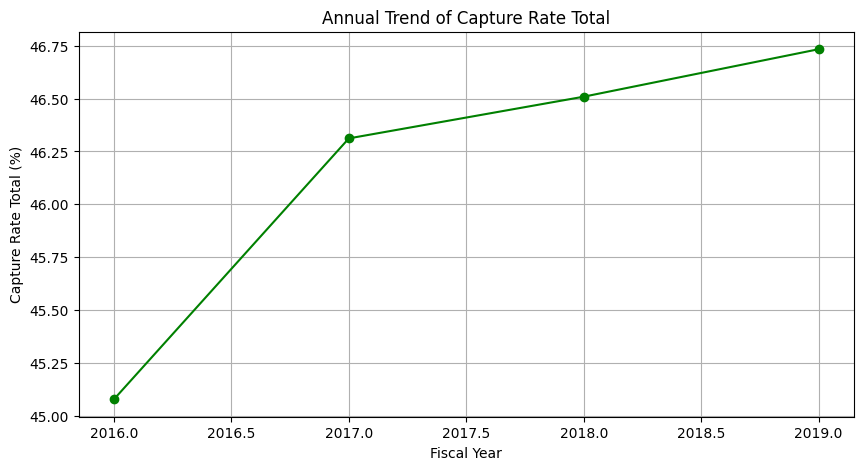

,Diversion Rate-Total,Capture Rate-Total
Fiscal Year,,
2016,16.743875,45.078814
2017,17.319654,46.311827
2018,17.852903,46.508928
2019,18.019666,46.733341


In [ ]:
# Calculating the average annual recycling rates
yearly_avg = df.groupby("Fiscal Year")[["Diversion Rate-Total", "Capture Rate-Total"]].mean()

# Graph: Evolution of the Diversion Rate-Total over time
plt.figure(figsize=(10,5))
plt.plot(yearly_avg.index, yearly_avg["Diversion Rate-Total"], marker='o', linestyle='-')
plt.xlabel("Fiscal Year")
plt.ylabel("Diversion Rate Total (%)")
plt.title("Annual Trend of Diversion Rate Total")
plt.grid(True)
plt.show()

# Graph: Evolution of the Capture Rate-Total over time
plt.figure(figsize=(10,5))
plt.plot(yearly_avg.index, yearly_avg["Capture Rate-Total"], marker='o', linestyle='-', color='green')
plt.xlabel("Fiscal Year")
plt.ylabel("Capture Rate Total (%)")
plt.title("Annual Trend of Capture Rate Total")
plt.grid(True)
plt.show()

# Calculating the average annual recycling rates
yearly_avg = df.groupby("Fiscal Year")[["Diversion Rate-Total", "Capture Rate-Total"]].mean()


# Showing the table with the evolution of recycling rates by year
display(yearly_avg)



In [ ]:
df.columns

Index(['Zone', 'District', 'Fiscal Month Number', 'Fiscal Year', 'Month Name',
       'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP',
       'Capture Rate-Total'],
      dtype='object')

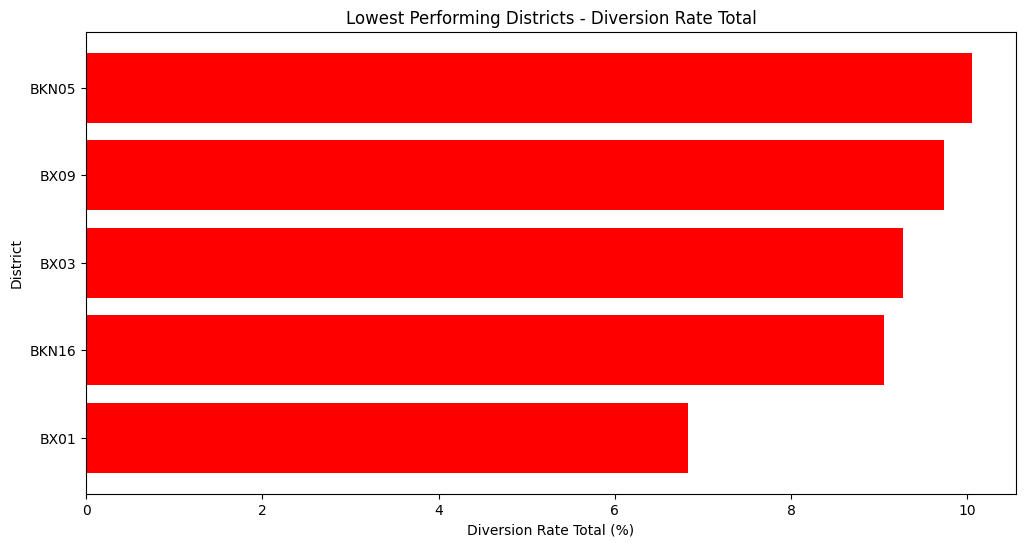

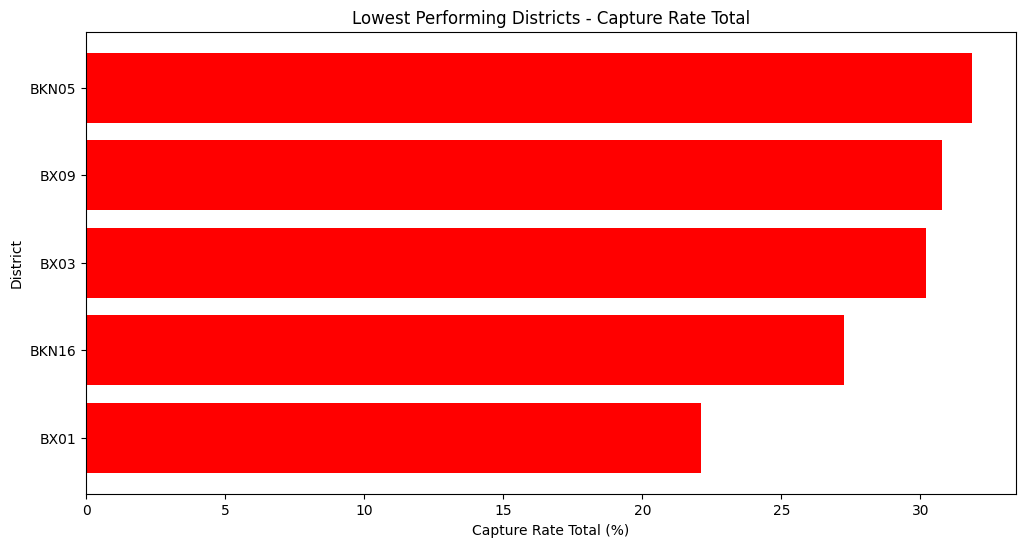

,Diversion Rate-Total,Capture Rate-Total
District,,
BX01,6.833435,22.108491
BKN16,9.049374,27.234333
BX03,9.274373,30.208657
BX09,9.737491,30.789084
BKN05,10.049036,31.842562


In [ ]:
# Identifying the 5 worst performing districts in Diversion Rate-Total and Capture Rate-Total
lowest_performing_districts = df.groupby("District")[["Diversion Rate-Total", "Capture Rate-Total"]].mean().nsmallest(5, "Diversion Rate-Total")

# Chart: Districts with the lowest Diversion Rate-Total
plt.figure(figsize=(12,6))
plt.barh(lowest_performing_districts.index, lowest_performing_districts["Diversion Rate-Total"], color='red')
plt.xlabel("Diversion Rate Total (%)")
plt.ylabel("District")
plt.title("Lowest Performing Districts - Diversion Rate Total")
plt.show()

# Chart: Districts with the lowest Capture Rate-Total
plt.figure(figsize=(12,6))
plt.barh(lowest_performing_districts.index, lowest_performing_districts["Capture Rate-Total"], color='red')
plt.xlabel("Capture Rate Total (%)")
plt.ylabel("District")
plt.title("Lowest Performing Districts - Capture Rate Total")
plt.show()

# Showing table with low-performing districts
display(lowest_performing_districts)


In [ ]:
df. columns

Index(['Zone', 'District', 'Fiscal Month Number', 'Fiscal Year', 'Month Name',
       'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP',
       'Capture Rate-Total'],
      dtype='object')

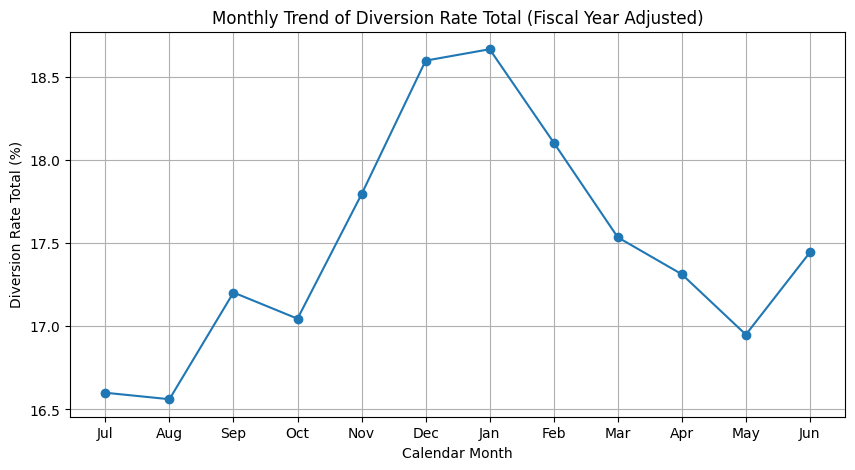

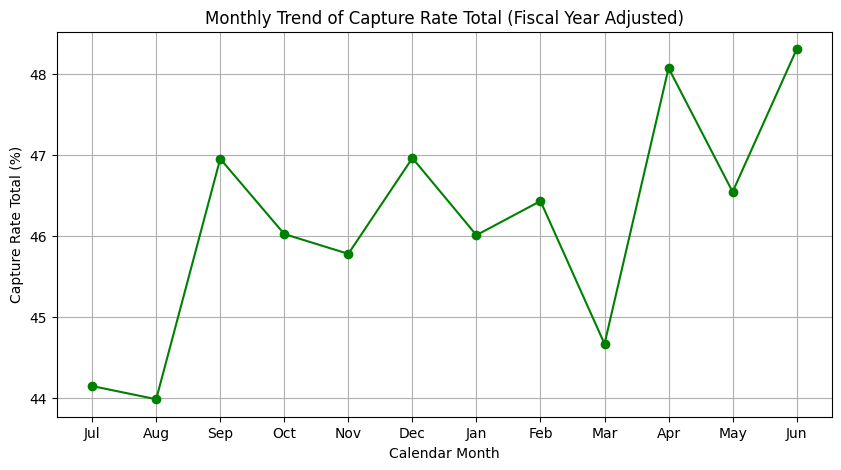

,Diversion Rate-Total,Capture Rate-Total
Calendar Month,,
Jul,16.600315,44.150677
Aug,16.561398,43.988231
Sep,17.202731,46.953296
Oct,17.045300,46.025408
Nov,17.793610,45.781062
Dec,18.596262,46.962349
Jan,18.664750,46.011804
Feb,18.103569,46.432204
Mar,17.534393,44.670795


In [ ]:
# Correcting fiscal year month names to the actual calendar
fiscal_to_calendar = {
    1: "Jul", 2: "Aug", 3: "Sep", 4: "Oct", 5: "Nov", 6: "Dec",
    7: "Jan", 8: "Feb", 9: "Mar", 10: "Apr", 11: "May", 12: "Jun"
}
df["Calendar Month"] = df["Fiscal Month Number"].map(fiscal_to_calendar)

# Grouping by calendar month
monthly_avg = df.groupby("Calendar Month")[["Diversion Rate-Total", "Capture Rate-Total"]].mean()
months_order = ["Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun"]
monthly_avg = monthly_avg.reindex(months_order)

# Graph: Diversion Rate-Total per month
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg["Diversion Rate-Total"], marker='o', linestyle='-')
plt.xlabel("Calendar Month")
plt.ylabel("Diversion Rate Total (%)")
plt.title("Monthly Trend of Diversion Rate Total (Fiscal Year Adjusted)")
plt.grid(True)
plt.show()

# Graph: Capture Rate-Total per month
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg["Capture Rate-Total"], marker='o', linestyle='-', color='green')
plt.xlabel("Calendar Month")
plt.ylabel("Capture Rate Total (%)")
plt.title("Monthly Trend of Capture Rate Total (Fiscal Year Adjusted)")
plt.grid(True)
plt.show()

# Showing table
display(monthly_avg)


In [ ]:
df.columns

Index(['Zone', 'District', 'Fiscal Month Number', 'Fiscal Year', 'Month Name',
       'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP',
       'Capture Rate-Total', 'Calendar Month'],
      dtype='object')

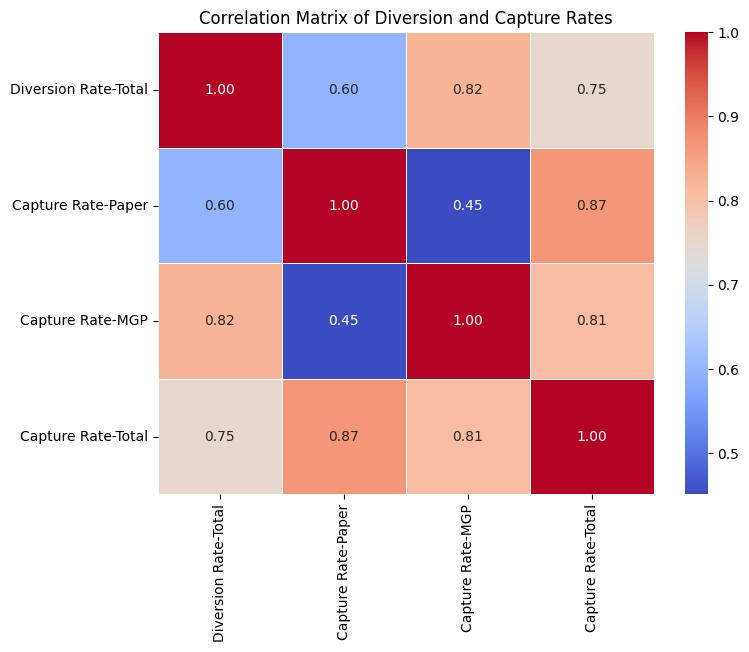

,Diversion Rate-Total,Capture Rate-Paper,Capture Rate-MGP,Capture Rate-Total
Diversion Rate-Total,1.000000,0.595113,0.823796,0.748865
Capture Rate-Paper,0.595113,1.000000,0.451435,0.866771
Capture Rate-MGP,0.823796,0.451435,1.000000,0.809871
Capture Rate-Total,0.748865,0.866771,0.809871,1.000000


In [ ]:
# Calculating correlation between recycling rates
correlation_matrix = df[["Diversion Rate-Total", "Capture Rate-Paper", "Capture Rate-MGP", "Capture Rate-Total"]].corr()

# Graph: Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Diversion and Capture Rates")
plt.show()

# Showing table
display(correlation_matrix)


In [ ]:
df.columns

Index(['Zone', 'District', 'Fiscal Month Number', 'Fiscal Year', 'Month Name',
       'Diversion Rate-Total', 'Capture Rate-Paper', 'Capture Rate-MGP',
       'Capture Rate-Total'],
      dtype='object')

ANOVA Diversion Rate: F_onewayResult(statistic=np.float64(8.56497274290363), pvalue=np.float64(1.1658141208795261e-05))
ANOVA Capture Rate: F_onewayResult(statistic=np.float64(4.313279495575829), pvalue=np.float64(0.0048294625906752835))


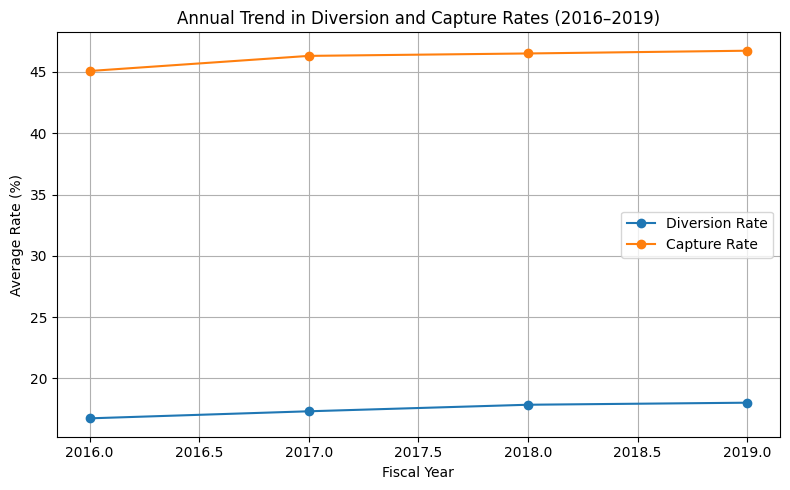

In [ ]:
from scipy.stats import f_oneway

# Grouping by year and calculate averages
yearly_stats = df.groupby("Fiscal Year")[["Diversion Rate-Total", "Capture Rate-Total"]].mean().reset_index()

# Preparing data by year
diversion_by_year = [df[df["Fiscal Year"] == year]["Diversion Rate-Total"] for year in range(2016, 2020)]
capture_by_year = [df[df["Fiscal Year"] == year]["Capture Rate-Total"] for year in range(2016, 2020)]

# ANOVA
anova_diversion = f_oneway(*diversion_by_year)
anova_capture = f_oneway(*capture_by_year)

# Showing results
print("ANOVA Diversion Rate:", anova_diversion)
print("ANOVA Capture Rate:", anova_capture)

# Graph
plt.figure(figsize=(8, 5))
plt.plot(yearly_stats["Fiscal Year"], yearly_stats["Diversion Rate-Total"], marker="o", label="Diversion Rate")
plt.plot(yearly_stats["Fiscal Year"], yearly_stats["Capture Rate-Total"], marker="o", label="Capture Rate")
plt.xlabel("Fiscal Year")
plt.ylabel("Average Rate (%)")
plt.title("Annual Trend in Diversion and Capture Rates (2016–2019)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
